# Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [4]:
using LinearAlgebra

In [5]:
# using for loops

function my_own_dot(x, y)
    sum = 0
    for i in 1:size(x, 1)
        sum += x[i] * y[i]
    end
       
    return sum
    
end

my_own_dot (generic function with 1 method)

In [6]:
my_own_dot([1;1], [2;3])

5

In [7]:
function dot_func(x, y)
    return dot(x, y)
end

dot_func (generic function with 1 method)

In [8]:
function matrix_times_vector(m, v)
    return m * v
end

matrix_times_vector (generic function with 1 method)

In [9]:
x = [1, 2, 3]
y = [4, 5, 6]

m = [1 2; 3 4]
v = [5, 6]

@time dot_func(x, y)
@time matrix_times_vector(m, v)

  0.022638 seconds (17.30 k allocations: 948.933 KiB, 99.91% compilation time)
  0.058725 seconds (174.78 k allocations: 9.353 MiB, 99.95% compilation time)


2-element Vector{Int64}:
 17
 39

In [10]:
function dot_func_timetest(size)
    
    x = rand(size)
    y = rand(size)
    return @elapsed dot_func(x, y)
    
end

dot_func_timetest (generic function with 1 method)

In [11]:
dot_func_timetest(10000)

1.2e-5

In [12]:
function matrix_times_vector_timetest(size)
    
    m = rand(0.0:0.01:1.0, size, size)  # random matrix size x size
    v = rand(size)
    return @elapsed matrix_times_vector(m, v)
    
end

matrix_times_vector_timetest (generic function with 1 method)

In [13]:
matrix_times_vector_timetest(1000)

0.000485

In [14]:
# import Pkg
# Pkg.add("DataFrames")
using DataFrames

In [13]:
asd = "asd"
typeof(asd)

String

In [19]:
df3 = DataFrame(Size=Int[], Type=String[], time=Float64[])

for size = 100000:100000:1000000
    for i = 1:10
        time = dot_func_timetest(size)
        push!(df3, (size, "vxv", time))
    end
end

df3

Row,Size,Type,time
,Int64,String,Float64
1,100000,vxv,0.0001036
2,100000,vxv,0.0001099
3,100000,vxv,9.69e-5
4,100000,vxv,0.0001316
5,100000,vxv,0.0002706
6,100000,vxv,0.0002614
7,100000,vxv,0.0002244
8,100000,vxv,0.0001371
9,100000,vxv,0.0001563


In [20]:
df2 = DataFrame(Size=Int[], Type=String[], time=Float64[])

for size = 1000:1000:10000
    for i = 1:10
        time = matrix_times_vector_timetest(size)
        push!(df2, (size, "mxv", time))
    end
end

for size = 100000:100000:1000000
    for i = 1:10
        time = dot_func_timetest(size)
        push!(df2, (size, "vxv", time))
    end
end


df2

Row,Size,Type,time
,Int64,String,Float64
1,1000,mxv,0.0004943
2,1000,mxv,0.0004291
3,1000,mxv,0.0004202
4,1000,mxv,0.0004312
5,1000,mxv,0.0004516
6,1000,mxv,0.0004642
7,1000,mxv,0.0004519
8,1000,mxv,0.0004608
9,1000,mxv,0.000463


In [12]:
df = DataFrame(Size=Int[], Dot=Float64[], MatrixTimesVector=Float64[])

for size = 1000:1000:10000
    for i = 1:10
        dot = dot_func_timetest(size)
        matrix = matrix_times_vector_timetest(size)
        push!(df, (size, dot, matrix))
    end
end

df

Row,Size,Dot,MatrixTimesVector
,Int64,Float64,Float64
1,1000,1.9e-6,0.000382
2,1000,1.9e-6,0.000427
3,1000,7.0e-7,0.0006456
4,1000,7.0e-7,0.0004695
5,1000,7.0e-7,0.0005357
6,1000,6.0e-7,0.0004604
7,1000,7.0e-7,0.0004661
8,1000,1.1e-6,0.0004462
9,1000,1.1e-6,0.000495


In [21]:
using CSV

# saving into csv file

CSV.write("results2.csv", df2)

"results2.csv"

In [14]:
# reading from csv file

df_read = CSV.read("results.csv", delim=",", DataFrame)

Row,Size,Dot,MatrixTimesVector
,Int64,Float64,Float64
1,1000,1.9e-6,0.000382
2,1000,1.9e-6,0.000427
3,1000,7.0e-7,0.0006456
4,1000,7.0e-7,0.0004695
5,1000,7.0e-7,0.0005357
6,1000,6.0e-7,0.0004604
7,1000,7.0e-7,0.0004661
8,1000,1.1e-6,0.0004462
9,1000,1.1e-6,0.000495


In [15]:
# grouping by length

df_grouped = groupby(df_read, :Size)

Row,Size,Dot,MatrixTimesVector
,Int64,Float64,Float64
1,1000,1.9e-6,0.000382
2,1000,1.9e-6,0.000427
3,1000,7.0e-7,0.0006456
4,1000,7.0e-7,0.0004695
5,1000,7.0e-7,0.0005357
6,1000,6.0e-7,0.0004604
7,1000,7.0e-7,0.0004661
8,1000,1.1e-6,0.0004462
9,1000,1.1e-6,0.000495


In [16]:
using Statistics

#  df ready to show on the plot

df_forplot = combine(df_grouped, "Dot" => mean, "Dot" => std, 
    "MatrixTimesVector" => mean, "MatrixTimesVector" => std)

Row,Size,Dot_mean,Dot_std,MatrixTimesVector_mean,MatrixTimesVector_std
,Int64,Float64,Float64,Float64,Float64
1,1000,1.03e-6,4.90011e-7,0.00048245,7.08856e-5
2,2000,1.15e-6,2.22361e-7,0.00137455,0.000151072
3,3000,2.35e-6,1.98396e-6,0.0027916,0.000238233
4,4000,1.75e-6,8.49837e-8,0.00427875,0.000358997
5,5000,1.96e-6,1.42984e-7,0.00672496,0.000420262
6,6000,3.67e-6,5.35455e-6,0.00933039,0.000352994
7,7000,3.61e-6,4.25008e-6,0.0125312,0.000199313
8,8000,2.98e-6,1.75119e-7,0.0160163,0.000664679
9,9000,2.79e-6,2.42441e-7,0.0220924,0.00199204


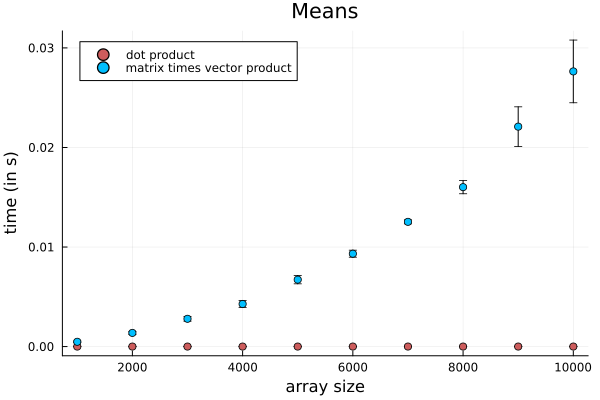

In [17]:
using Plots

scatter(df_forplot.Size,
    [df_forplot.Dot_mean df_forplot.MatrixTimesVector_mean],
    colour = [:indianred :deepskyblue ],
    yerr = [df_forplot.Dot_std df_forplot.MatrixTimesVector_std],  # error bar
    label = ["dot product" "matrix times vector product"],
    title = "Means",
    xlab = "array size",
    ylab = "time (in s)"
)

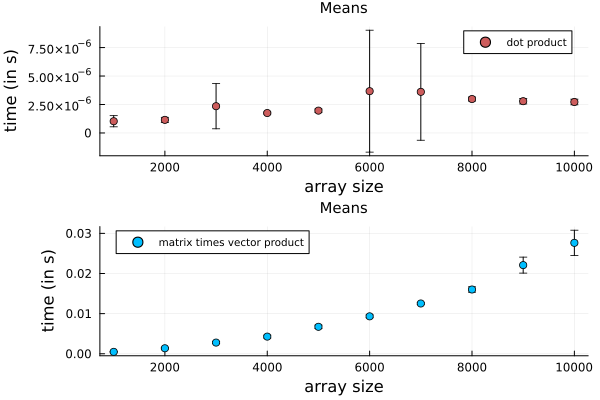

In [18]:
using Plots

using Plots
scatter(df_forplot.Size,
    [df_forplot.Dot_mean df_forplot.MatrixTimesVector_mean],
    colour = [:indianred :deepskyblue ],
    yerr = [df_forplot.Dot_std df_forplot.MatrixTimesVector_std],
    label = ["dot product" "matrix times vector product"],
    legendfontsize = 7,
    title = "Means",
    titlefontsize = 10,
    xlab = "array size",
    ylab = "time (in s)",
    layout = (2,1)
)